In [1]:
from autoencoder import *

In [2]:
theta = np.linspace(-np.pi,0.0*np.pi,500, dtype=np.float32)
data = np.vstack([np.cos(theta), np.sin(theta)]).T
dataset = tf.data.Dataset.from_tensor_slices(data)

In [3]:
def make_datastream(dataset, batchsize=200, buffer_size=1000):
    repeat_dataset = dataset.repeat()
    shuffled_dataset = repeat_dataset.shuffle(buffer_size=buffer_size)
    batched_dataset = shuffled_dataset.batch(batchsize)
    iterator = batched_dataset.make_one_shot_iterator()
    next_element = iterator.get_next()
    return tf.stack(next_element)

In [4]:
graph = tf.Graph()
with graph.as_default():
    tr_x = make_datastream(dataset)
    au = PolyAutoencoder(2,1,tr_x, 5,5)
    init=tf.global_variables_initializer()

In [5]:
try:
    sess.close()
except:
    pass
sess = tf.InteractiveSession(graph=graph)
init.run(session=sess)

In [6]:
for i in xrange(10000):
    #train_step.run(session=sess)
    sess.run(au.train_step)
    if i%1000==99:
        print au.goal.eval(session=sess)

33.28472
0.007283615
0.0014298414
0.037119813
0.0008974622
0.01039328
0.0034381798
0.0007507034
0.0064251246
0.0024736745


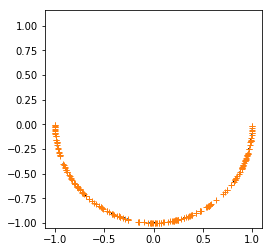

In [7]:
au.plot_distance()

In [8]:
au.vars['dec:W'].eval()

array([[-0.96354944,  0.3007812 ],
       [ 0.10511664,  0.507465  ],
       [-0.14387825,  0.05473173],
       [ 0.10005549,  0.24149747],
       [ 0.19781427,  0.00975458]], dtype=float32)

In [9]:
with graph.as_default():
    # The mass matrix
    momentum = tf.constant(0.5)*tf.reduce_sum( tf.pow( au.o_x , 2 ) )
    o_M = tf.hessians( momentum, au.i_q )[0]
    o_U = au.o_x[:,1]
    o_gradU = tf.gradients( o_U, au.i_q)[0]
    o_gradX = tf.gradients(au.o_x, au.i_q)[0]

In [10]:
o_M.eval(feed_dict={au.i_q:np.array([[0.0]])})

array([[[[-0.01323342]]]], dtype=float32)

In [11]:
o_gradU.eval(feed_dict={au.i_q:np.array([[0.0]])})

array([[0.3007812]], dtype=float32)

In [12]:
o_gradX.eval(feed_dict={au.i_q:np.array([[0.0]])})

array([[-0.66276824]], dtype=float32)

In [13]:
au.o_x.eval(feed_dict={au.i_q:np.array([[0.0]])})

array([[-0.2933348, -0.9561857]], dtype=float32)

In [14]:
au.o_x.shape

TensorShape([Dimension(None), Dimension(2)])

In [15]:
au.i_q.shape

TensorShape([Dimension(None), Dimension(1)])

In [16]:
def mygrad(y, x):
    yl = tf.unstack(y,axis=1)
    gl = [ tf.gradients(_,x)[0] for _ in yl ]
    for _ in gl:
        print _.shape
    return tf.stack(gl,axis=-1)

In [17]:
o_gradX = mygrad(au.o_x, au.i_q)

(?, 1)
(?, 1)


\begin{equation}
\dot{q} = \left( \frac{\partial x}{\partial q} \right)^\dagger v
\end{equation}

In [18]:
gX = o_gradX.eval(feed_dict={au.i_q:np.array([[0.0]])})

In [19]:
np.linalg.pinv(gX)

array([[[-0.9456791],
        [ 0.2952028]]], dtype=float32)

In [20]:
gX

array([[[-0.96354944,  0.3007812 ]]], dtype=float32)